<a href="https://colab.research.google.com/github/MillenRodrigues/Paradigmas-de-Programa-o---Atividade-T1/blob/main/PL_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Atividade T1 - Aprofundamento
Millen Tavares Rodrigues - Tia: 92300073
---





Para esta atividade eu escolhi o livro "O Poder do Agora" autor Eckhart Tolle, ganhei este livro da minha chefe e lembrei que preciso ler ele.

<img src="https://m.media-amazon.com/images/I/71ef0B1lsrL.jpg" width="250"/>




## Aquisição dos Dados

In [28]:
import urllib.request  # essa bibliotéca é para trazer texto da internet

# Estou criando uma variavel de texto vazia para adicionar o texto linha a linha
texto = []

def limpa_linha(linha):
    ''' Está função troca todas as letras por minuscula e remove caracteres especiais'''
    linha=linha.lower()# minusculo
    for limpeza in ['\n','.', ',','(',')','?','\'','"','!',':',';', '“', '”']:
        linha=linha.replace(limpeza,'')
    return linha   

# Para cada linha do texto, adicionar a linha na lista texto
for line in urllib.request.urlopen('https://archive.org/stream/OPoderDoAgoraEckhartTolle/O%20Poder%20Do%20Agora%20-%20Eckhart%20Tolle_djvu.txt'): 
    texto.append(limpa_linha(line.decode('utf-8')))




# Construção do Dicionário

In [42]:
# usado para remover tags de html
def e_palavra_valida(palavra):
  ''' verifica se uma palavra é válida ou se é lixo do html '''
  for caractere_invalido in ['<','>','/','\\','|','$','&', '_', '-', '=', '@', '#', '[', ']', '{', '}',
                             '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']:
    if caractere_invalido in palavra: # se tiver um desses caracteres é código html
      return False
  return True

dicionario = {}
for linha in texto: # para cada linha do texto
  for palavra in linha.split(): # para cada palavra da linha
    if e_palavra_valida(palavra): # verifica se a palavra é vállida
      if palavra not in dicionario: # se não estiver no dicionario adiciona
        dicionario[palavra] = 1
      else: # se estiver adiciona 1
        dicionario[palavra]=dicionario[palavra]+1
    
print(dicionario)    

{'v': 1, 'text': 3, 'of': 26, 'poder': 73, 'do': 940, 'agora': 220, 'eckhart': 10, 'the': 25, 'following': 1, 'is': 4, 'entire': 2, 'license': 6, 'notice': 2, 'for': 55, '*': 17, 'javascript': 2, 'code': 2, 'in': 9, 'this': 6, 'page': 6, 'program': 3, 'free': 3, 'software': 6, 'you': 2, 'can': 2, 'redistribute': 1, 'it': 4, 'modify': 1, 'under': 1, 'terms': 1, 'gnu': 3, 'affero': 3, 'general': 3, 'public': 5, 'as': 294, 'published': 1, 'by': 3, 'foundation': 2, 'either': 1, 'version': 2, 'or': 3, 'at': 1, 'your': 1, 'option': 1, 'any': 2, 'later': 1, 'distributed': 1, 'hope': 1, 'that': 2, 'will': 1, 'be': 3, 'useful': 1, 'but': 1, 'without': 2, 'warranty': 2, 'even': 1, 'implied': 1, 'merchantability': 1, 'fitness': 1, 'a': 2393, 'particular': 7, 'purpose': 1, 'see': 2, 'more': 3, 'details': 1, 'should': 1, 'have': 1, 'received': 1, 'copy': 1, 'along': 1, 'with': 2, 'if': 5, 'not': 1, 'above': 1, 'icon': 2, 'to': 4, 'main': 2, 'wraps': 1, 'all': 1, 'content': 5, 'hidden': 13, 'planned

# Exibição dos Resultados

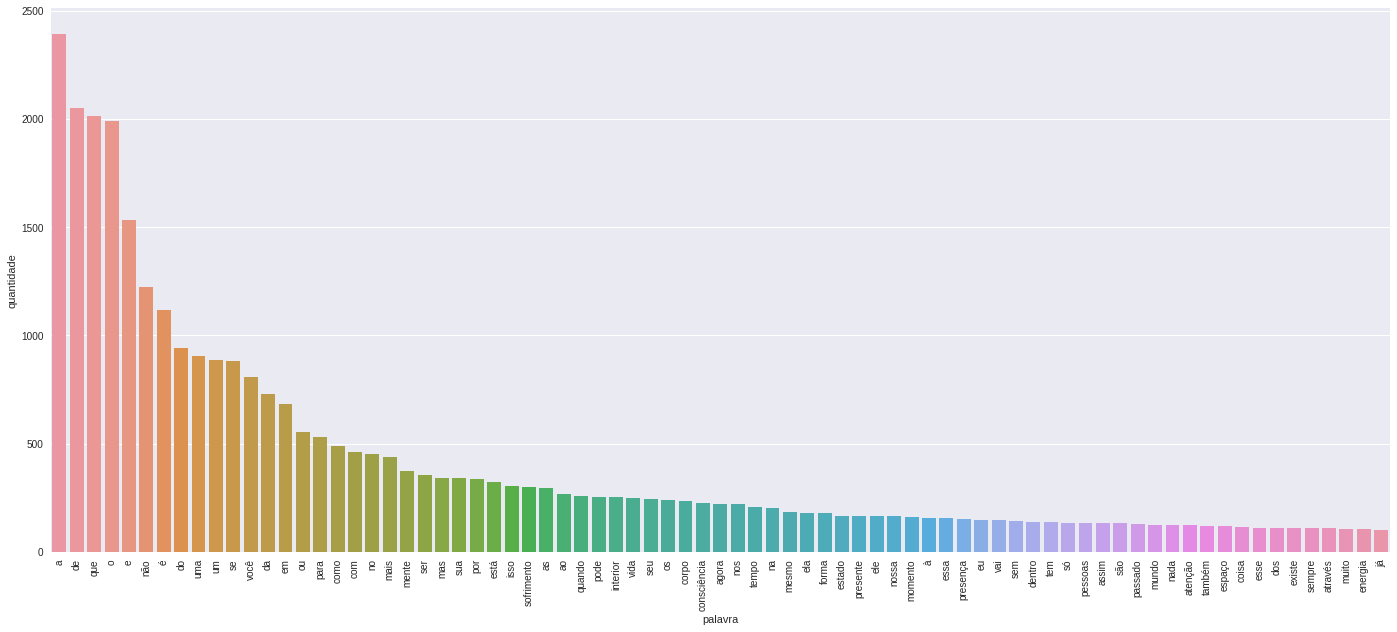

In [43]:
# bibliotecas necessarias
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# constroi o dataframe para plotar o grafico
df = pd.DataFrame(dicionario.items(),  columns=['palavra', 'quantidade']).sort_values('quantidade',ascending=False)
df = df[df['quantidade'] > 100] # somente termos com mais de 100 ocorrências
# Aumentei o corte para 100, porque o livro tem mais de 7000 termos

# formata o grafico de acordo com o exercicio 
plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.palavra,y=df['quantidade'])
plt.xticks(rotation=90) 

#mostrar o grafico
plt.show()

# Conclusão 

Após remover as tags html e caractéries especiais é possivel verificar que o livro segue a distibuição esperada segundo a lei de Zipf.

Busquei fontes que me ajudaram a compreender o funcionamento da lei com mais clareza, [esse video foi de grande ajuda](https://youtu.be/fCn8zs912OE).